In [1]:
import os

for dirname, subdirs, files in os.walk('/kaggle/input'):
    print(f"📂 {dirname}")
    for f in files:
        print(f"  └── {f}")


📂 /kaggle/input
📂 /kaggle/input/yolov5-training-bundle-skyfusion-dataset-included
📂 /kaggle/input/yolov5-training-bundle-skyfusion-dataset-included/yolo_training_bundle
📂 /kaggle/input/yolov5-training-bundle-skyfusion-dataset-included/yolo_training_bundle/skyfusion_yolo
  └── skyfusion.yaml
📂 /kaggle/input/yolov5-training-bundle-skyfusion-dataset-included/yolo_training_bundle/skyfusion_yolo/valid
  └── labels.cache
📂 /kaggle/input/yolov5-training-bundle-skyfusion-dataset-included/yolo_training_bundle/skyfusion_yolo/valid/labels
  └── 3b2057753_png_jpg.rf.5b18d53c6cb944da6ece6834b96c60a3.txt
  └── d8873734-016a-4b9d-9b9e-8bc47eb13fef_0_0_jpg.rf.95c74be0a0ba75aa5985bc3e54496aee.txt
  └── P1459__1-0__0___1800_png_jpg.rf.907f568fb7d2c59de004aeaa60c91442.txt
  └── 58956bcc-11fc-4357-8d75-32fee9feaf07_0_1060_jpg.rf.1c156f2cd514d9caf29e6ce1fc70a863.txt
  └── 22082_png_jpg.rf.4fe2b223f1e24c89dac2644bef78033b.txt
  └── 77f7b57f-5cf2-424d-a952-9847b3c3f35e_1060_1060_jpg.rf.50a145782f93063dcf4271

In [2]:
# ZIP entpacken
!unzip -q ../input/yolov5-training-bundle-skyfusion-dataset-included/yolo_training_bundle.zip -d /kaggle/working/


unzip:  cannot find or open ../input/yolov5-training-bundle-skyfusion-dataset-included/yolo_training_bundle.zip, ../input/yolov5-training-bundle-skyfusion-dataset-included/yolo_training_bundle.zip.zip or ../input/yolov5-training-bundle-skyfusion-dataset-included/yolo_training_bundle.zip.ZIP.


In [3]:
# 1. Ordner in Arbeitsverzeichnis kopieren
!cp -r /kaggle/input/yolov5-training-bundle-skyfusion-dataset-included/yolo_training_bundle/yolov5 /kaggle/working/

# 2. Ins Verzeichnis wechseln
%cd /kaggle/working/yolov5

# 3. Installiere Abhängigkeiten
!pip install -r requirements.txt


/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.9 MB/s eta 0:00:00
  Att

In [4]:
yaml_path = "/kaggle/working/skyfusion_kaggle.yaml"

with open(yaml_path, "w") as f:
    f.write("""
train: /kaggle/input/yolov5-training-bundle-skyfusion-dataset-included/yolo_training_bundle/skyfusion_yolo/train/images
val: /kaggle/input/yolov5-training-bundle-skyfusion-dataset-included/yolo_training_bundle/skyfusion_yolo/valid/images

nc: 4
names: ['unknown','aircraft', 'ship','vehicle']
""")

print(f"✅ YAML-Datei erfolgreich gespeichert: {yaml_path}")


✅ YAML-Datei erfolgreich gespeichert: /kaggle/working/skyfusion_kaggle.yaml


In [10]:
# W&B vollständig deaktivieren
%env WANDB_MODE=disabled

# In den richtigen Ordner wechseln
%cd /kaggle/working/yolov5

# YOLOv5 Training starten
!python train.py \
  --img 640 \
  --batch 32\
  --epochs 80 \
  --data /kaggle/working/skyfusion_kaggle.yaml \
  --weights yolov5n.pt \
  --name skyfusion_kaggle_offline \
  --project runs/train \
  --exist-ok 



env: WANDB_MODE=disabled
/kaggle/working/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-07-24 07:41:09.922329: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753342869.945710     744 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753342869.953749     744 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5n.pt, cfg=, data=/kaggle/working/skyfusion_kaggle.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=80, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplo

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Pfad zur CSV-Datei
csv_path = 'runs/train/skyfusion_kaggle_offline/results.csv'

# CSV laden
df = pd.read_csv(csv_path)


In [15]:
print(df.columns)
print(df.columns.tolist())
df.columns = df.columns.str.strip()


Index(['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss',
       'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5',
       'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss',
       'x/lr0', 'x/lr1', 'x/lr2'],
      dtype='object')
['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss', 'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss', 'x/lr0', 'x/lr1', 'x/lr2']


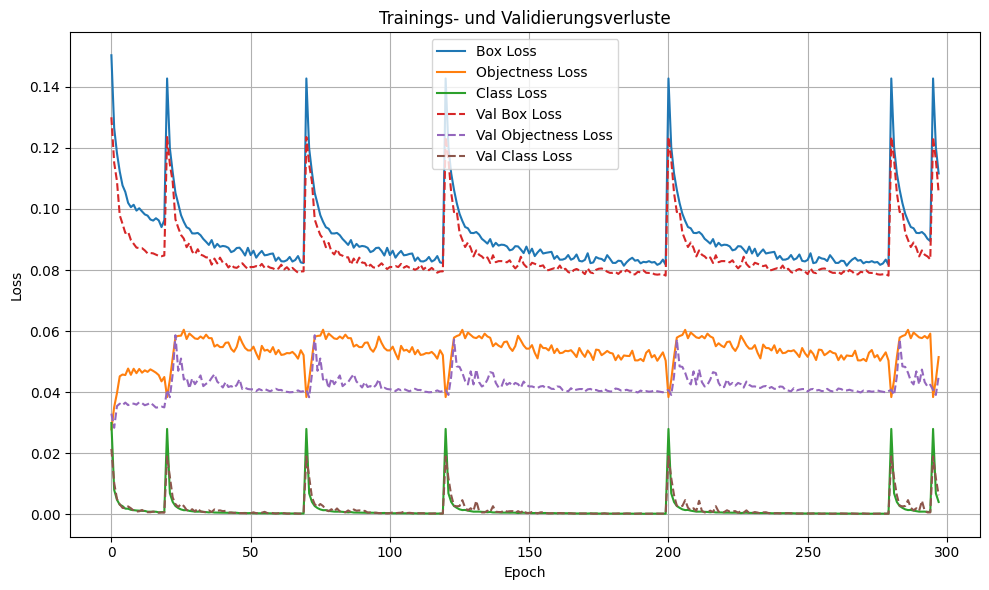

In [16]:
# Plot der Loss-Kurven
plt.figure(figsize=(10, 6))
plt.plot(df['train/box_loss'], label='Box Loss')
plt.plot(df['train/obj_loss'], label='Objectness Loss')
plt.plot(df['train/cls_loss'], label='Class Loss')
plt.plot(df['val/box_loss'], label='Val Box Loss', linestyle='--')
plt.plot(df['val/obj_loss'], label='Val Objectness Loss', linestyle='--')
plt.plot(df['val/cls_loss'], label='Val Class Loss', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Trainings- und Validierungsverluste")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [2]:
# TensorBoard innerhalb eines Notebooks anzeigen
%load_ext tensorboard
%tensorboard --logdir runs/train


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 68), started 0:06:38 ago. (Use '!kill 68' to kill it.)

<IPython.core.display.Javascript object>

In [9]:
 %reload_ext tensorboard
%tensorboard --logdir runs/train --host 0.0.0.0



Reusing TensorBoard on port 6007 (pid 113), started 0:00:32 ago. (Use '!kill 113' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
!tensorboard --logdir runs/train --port 6007




2025-07-24 13:38:59.041256: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753364339.062129     218 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753364339.068298     218 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.18.0 at http://localhost:6007/ (Press CTRL+C to quit)


In [13]:
!kill 113